#History of Convolutional Neural Networks
You might have already heard of image or facial recognition or self-driving cars. These are real-life implementations of Convolutional Neural Networks (CNNs). In this lab, you will learn and understand how to implement these deep, feed-forward artificial neural networks in Keras and also learn how to overcome overfitting with the regularization technique called *dropout*.

Machine Learning(ML) and Deep Learning(DL), a computer science branch that studies the design of algorithms that can learn. Deep learning is a subfield of machine learning that is inspired by artificial neural networks, which in turn are inspired by biological neural networks.

A specific kind of such a deep neural network is the convolutional network, which is commonly referred to as CNN or ConvNet. It's a deep, feed-forward artificial neural network. Feed-forward neural networks are also called multi-layer perceptrons(MLPs). These models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field e.g., some neurons in brain are fired or activated when exposed to vertical sides and some when shown a horizontal edge.

**ImageNet** Large Scale Visual Recognition Challenge**(ILSVRC)** began in the year 2010 is an annual competition where research teams assess their algorithms on the given data set and compete to achieve higher accuracy on several visual recognition tasks. In 2012, Alex Krizhevsky used convolutional neural networks to win that year's ImageNet Competition, reducing the classification error from 26% to 15%.<br>
This was the time when neural networks regained prominence after quite some time. This is often called the "third wave of neural networks". The other two waves were in the 1940s until the 1960s and in the 1970s to 1980s.

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical

# Preparing the dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Analyzing the data

In [ ]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

In [ ]:
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of output classes : ', nClasses)
print('Output classes : ', classes)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(f'Ground Truth: {classes[train_labels[i]]}')
plt.show()

# Data Preprocessing

1.   We'll convert each *28 x 28* image of the train and test set into a matrix of size *28 x 28 x 1* which is fed into the network.
2.   Before feeding it into the network we need to convert its type to *float32* because you will have to rescale the pixel values in range 0 - 1 inclusive.
3.   Now we need to convert the class labels into a **one-hot encoding** vector.
In one-hot encoding, we convert the categorical data into a vector of numbers. The reason why we convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. We generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding. For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1.
4.   In machine learning or any data specific task, we should partition the data correctly. For the model to generalize well, we split the training data into two parts, one designed for training and another one for validation. In this case, we will train the model on 80% of the training data and validate it on 20% of the remaining training data. This will also help to reduce overfitting since we will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [ ]:
train_images = train_images.reshape(-1, 28,28, 1)
test_images = test_images.reshape(-1, 28,28, 1)
train_images.shape, test_images.shape

In [ ]:
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

In [ ]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Train labels dimension (After encoding):', train_labels_one_hot.shape)
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_labels_one_hot[0])

In [ ]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_images, train_labels_one_hot, test_size=0.2, shuffle=True)
print(train_X.shape, valid_X.shape)
print(train_Y.shape, valid_Y.shape)

# The Network

In Keras, we can just stack up layers by adding the desired layer one by one. we'll first add a first convolutional layer with Conv2D(). We are using this function because we're working with images! The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. The ReLU function allows the activation to be thresholded at zero. Next, we'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem. Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

Different activation functions are depicted below.<br>
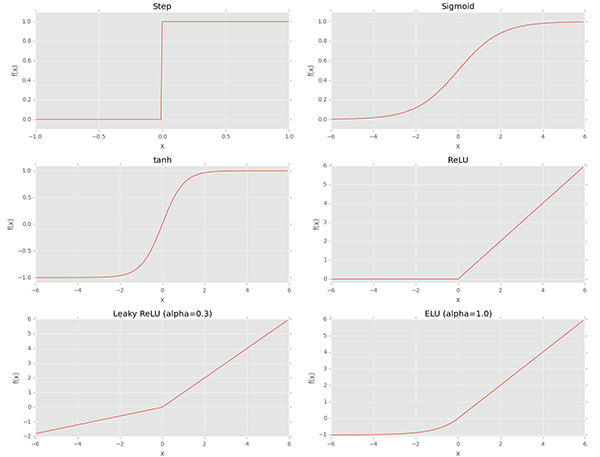

<font color='skyblue'>2D Convolution Layer Visualization</font><br>
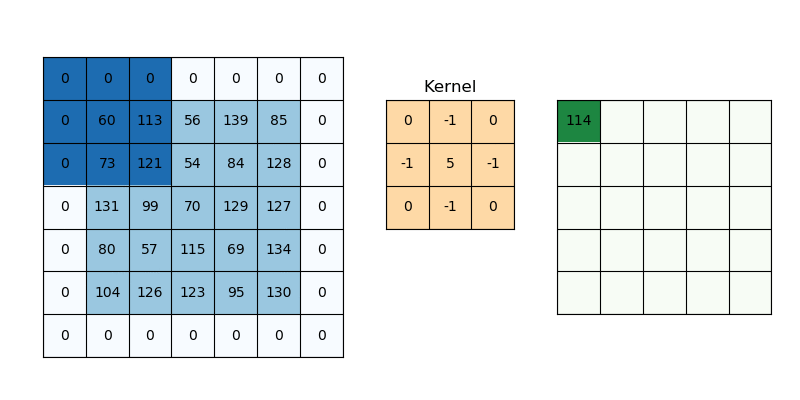


<font color='skyblue'>2D MaxPooling Layer Visualization</font><br>
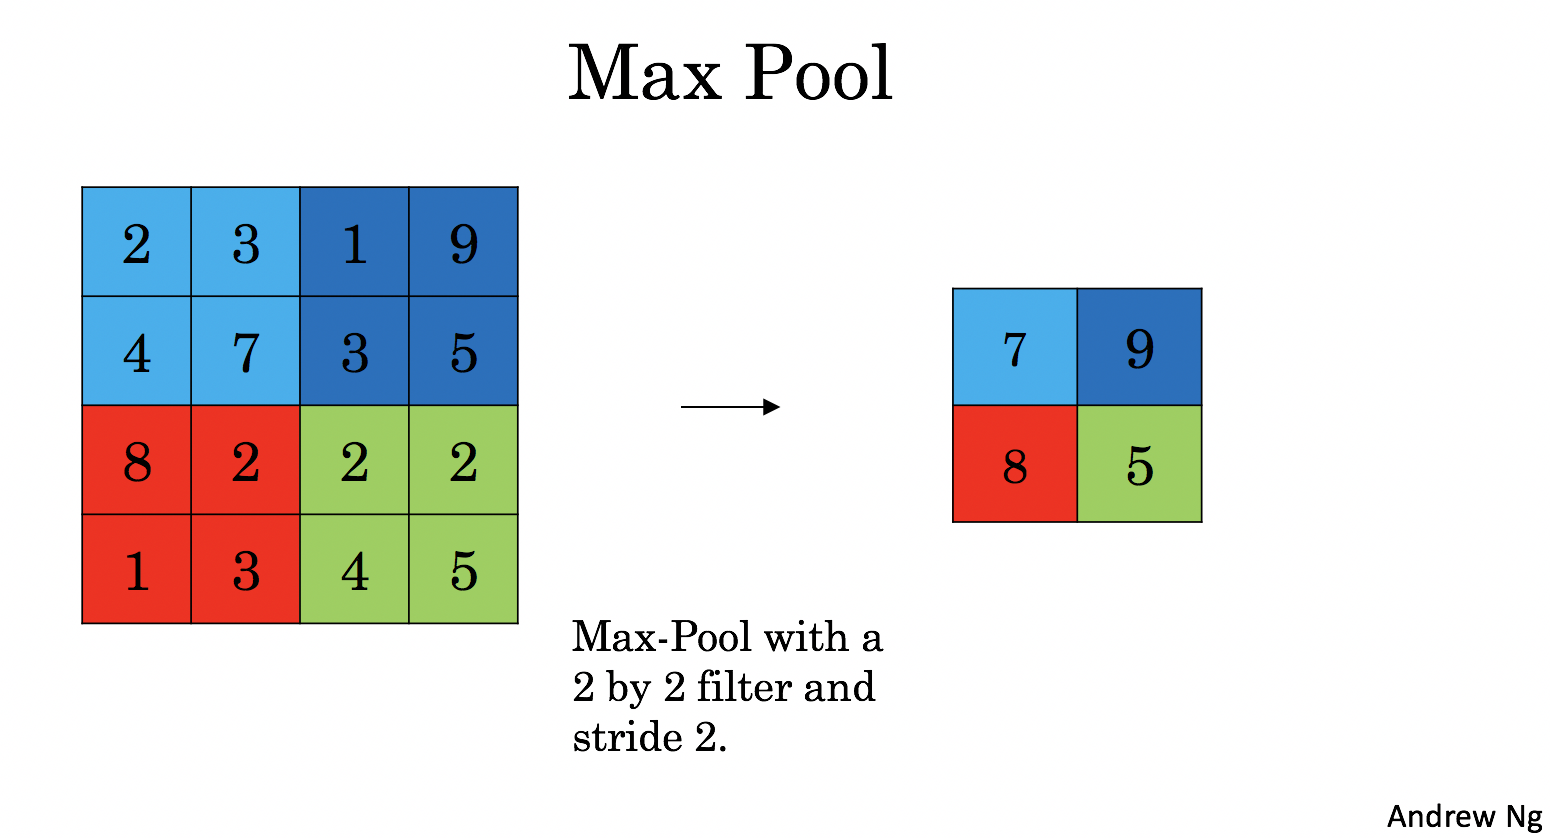

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Above, we can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, color_channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

To complete the model, we will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. MNIST has 10 output classes, so we use a final Dense layer with 10 outputs.  The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

The network summary shows that (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

# Compile and train the model

We will use a batch size of 64. Using a higher batch size of 128 or 256 is also preferable. It all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. We will train the network for 20 epochs.

In [ ]:
batch_size = 64
epochs = 10
num_classes = 10

After the model is created, we will compile it using the Adam optimizer, one of the most popular optimization algorithms. We have specified the loss type which is categorical cross entropy, which is used for multi-class classification. You can also use binary cross-entropy as the loss function. Lastly, we have specified the metrics as accuracy which you want to analyze while the model is training.

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

It's finally time to train the model with Keras' `fit()` function! The model trains for 20 epochs. The `fit()` function will return a **history** object. By storying the result of this function in `training_history`, we can use it later to plot the accuracy and loss between training and validation which will help us to analyze our model's performance visually.

In [ ]:
training_history = model.fit(train_X, train_Y,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(valid_X, valid_Y))

# Evaluate the model on Test Set

In [ ]:
test_eval = model.evaluate(test_images, test_labels_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

The test accuracy looks impressive. Are these results really all that good?
Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data.

# Plotting training history

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, we can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

# Remove overfitting by adding dropout

We can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:
training_history = model.fit(train_X, train_Y,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(valid_X, valid_Y))

In [ ]:
test_eval = model.evaluate(test_images, test_labels_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Prediction from Test set

In [ ]:
predicted_classes = model.predict(test_images)
predicted_classes.shape, test_labels_one_hot.shape

In [ ]:
print(predicted_classes[0])
print(np.argmax(np.round(predicted_classes[0])))

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape

# Plotting the predicted samples

In [ ]:
correct = np.where(predicted_classes==test_labels)[0]
print(f'correct labels - {len(correct)}')
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

# Plotting the misclassified samples

In [ ]:
correct = np.where(predicted_classes==test_labels)[0]
print(f'Misclassified labels - {(test_labels.shape[0]) - len(correct)}')
cnt = 0
for i in range (0,len(test_labels)):
  if(predicted_classes[i]!=test_labels[i]):
    
    plt.subplot(3,3,cnt+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], test_labels[i]))
    plt.tight_layout()
    cnt+=1
    if(cnt==9):
      break